In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from prettytable import PrettyTable 
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
from sklearn.svm import SVC
from math import sqrt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import warnings 
import warnings 
warnings.filterwarnings('ignore')


from sklearn.datasets import make_classification

from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/NoelTakudzwa/MyFirstProject/main/winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'] = [1 if quality >= 5 else 0 for quality in df['quality']]

In [ ]:
X = df.drop(['quality'],axis=1)

y = df['quality']

#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=50)

In [ ]:
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

pipe.score(X_test, y_test)

0.9625

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('LinearRegression',  LinearRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LinearRegression',  LinearRegression())])

pipe.score(X_test, y_test)

0.0402547836376953

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), (' GaussianNB',   GaussianNB())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), (' GaussianNB',   GaussianNB())])

pipe.score(X_test, y_test)

0.9275

In [14]:
pipe = Pipeline([('scaler', StandardScaler()), ('KNeighborsClassifier',  KNeighborsClassifier())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('KNeighborsClassifier',  KNeighborsClassifier())])

pipe.score(X_test, y_test)

0.96

In [15]:
pipe = Pipeline([('scaler', StandardScaler()), (' RandomForestRegressor',  RandomForestRegressor())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), (' RandomForestRegressor',  RandomForestRegressor())])

pipe.score(X_test, y_test)

0.02045716557344457

For cross-validation i have chosen GridSearchCV becasue my dataset is not very big so grib search will work efficiently and also all possible combinations will be run which makes it better than RandomisedSearchCV.

In [16]:
model = KNeighborsClassifier()
params = {'n_neighbors':list(range(1, 500, 2)), 
          'weights':['uniform', 'distance']}

grid = GridSearchCV(model, params, cv = 5, n_jobs=-1)

grid.fit(X_train, y_train)

print('Best Accuracy: ', grid.best_score_)
print('Best Parameters: ', grid.best_params_)

Best Accuracy:  0.9582984658298466
Best Parameters:  {'n_neighbors': 9, 'weights': 'uniform'}


In [17]:
model = SVC()
param_grid = {'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
              'kernel':['linear', 'rbf'],
              'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]} 
  
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train)

print('Best Accuracy: ', grid.best_score_)
print('Best Parameters: ', grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.958 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.8, kernel=linear;, score=0.958 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.8, kernel=linea

In [18]:
model = RandomForestRegressor()
param_grid = {'n_estimators' : [200, 400, 600, 800, 1000, 1200],
               'max_features' : ['auto', 'sqrt'],
               'max_depth' : [3, 4, 5, 6],
               }
  
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train)

print('Best Accuracy: ', grid.best_score_)
print('Best Parameters: ', grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=3, max_features=auto, n_estimators=200;, score=-0.062 total time=   0.5s
[CV 2/5] END max_depth=3, max_features=auto, n_estimators=200;, score=0.134 total time=   0.5s
[CV 3/5] END max_depth=3, max_features=auto, n_estimators=200;, score=-0.029 total time=   0.5s
[CV 4/5] END max_depth=3, max_features=auto, n_estimators=200;, score=0.070 total time=   0.5s
[CV 5/5] END max_depth=3, max_features=auto, n_estimators=200;, score=0.088 total time=   0.5s
[CV 1/5] END max_depth=3, max_features=auto, n_estimators=400;, score=-0.062 total time=   0.9s
[CV 2/5] END max_depth=3, max_features=auto, n_estimators=400;, score=0.123 total time=   0.9s
[CV 3/5] END max_depth=3, max_features=auto, n_estimators=400;, score=-0.012 total time=   0.9s
[CV 4/5] END max_depth=3, max_features=auto, n_estimators=400;, score=0.076 total time=   0.9s
[CV 5/5] END max_depth=3, max_features=auto, n_estimators=400;, score=0.107 tot

In [19]:
model = GaussianNB()
param_grid = {
              'var_smoothing' : [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
               }
  
grid = GridSearchCV(model, param_grid, verbose = 3)
  
grid.fit(X_train, y_train)

print('Best Accuracy: ', grid.best_score_)
print('Best Parameters: ', grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ................var_smoothing=0.01;, score=0.958 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.01;, score=0.958 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.958 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.01;, score=0.958 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.01;, score=0.958 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.950 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;, score=0.958 total time=   0.0s
[CV 3/5] END ...............var_smoothing=0.001;, score=0.954 total time=   0.0s
[CV 4/5] END ...............var_smoothing=0.001;, score=0.954 total time=   0.0s
[CV 5/5] END ...............var_smoothing=0.001;, score=0.958 total time=   0.0s
[CV 1/5] END ..............var_smoothing=0.0001;, score=0.950 total time=   0.0s
[CV 2/5] END ..............var_smoothing=0.0001;,

Assigning the best hyperparameters to each model and saving each. 


In [20]:
regressor3 = KNeighborsClassifier(n_neighbors=9, weights='uniform')
regressor3.fit(X_train, y_train)
y_prediction_knn = regressor3.predict(X_test)
y_prediction_knn = np.round(y_prediction_knn)

pickle.dump(regressor3, open('/content/red_wine_prediction_KNN', 'wb'))

In [21]:
regressor2 = SVC(C=1.4, gamma=0.8, kernel='rbf')
regressor2.fit(X_train, y_train)
y_prediction_svc = regressor2.predict(X_test)
y_prediction_svc = np.round(y_prediction_svc)

pickle.dump(regressor2, open('/content/red_wine_prediction_SVC', 'wb'))

In [22]:
regressor4 = RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=200)
regressor4.fit(X_train, y_train)
y_prediction_rf = regressor4.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf)

pickle.dump(regressor4, open('/content/red_wine_prediction_RFR', 'wb'))

In [23]:
regressor1 =  GaussianNB(var_smoothing=0.01)
regressor1.fit(X_train, y_train)
y_prediction_gnb = regressor1.predict(X_test)
y_prediction_gnb = np.round(y_prediction_gnb)

pickle.dump(regressor1, open('/content/red_wine_prediction_gaussianNB', 'wb'))

In [24]:
regressor5 = LinearRegression()
regressor5.fit(X_train, y_train)
y_prediction_lr = regressor5.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

pickle.dump(regressor5, open('/content/red_wine_prediction_LR', 'wb'))

In [25]:
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Linear", precision_score(y_test, y_prediction_lr, average = 'weighted'),
           recall_score(y_test, y_prediction_lr, average = 'weighted'), f1_score(y_test, y_prediction_lr, average = 'weighted')])
ptbl.add_row(["SVM", precision_score(y_test, y_prediction_gnb, average = 'weighted'), recall_score(y_test, y_prediction_gnb, average = 'weighted'), 
           f1_score(y_test, y_prediction_gnb, average = 'weighted')])
ptbl.add_row(["Random Forest", precision_score(y_test, y_prediction_rf, average = 'weighted'), recall_score(y_test, y_prediction_rf, average = 'weighted'),
           f1_score(y_test, y_prediction_rf, average = 'weighted')])
ptbl.add_row(["KNN", precision_score(y_test, y_prediction_knn, average = 'weighted'), recall_score(y_test, y_prediction_knn, average = 'weighted'),
           f1_score(y_test, y_prediction_knn, average = 'weighted')])
ptbl.add_row(["GNB", precision_score(y_test, y_prediction_gnb, average = 'weighted'), recall_score(y_test, y_prediction_gnb, average = 'weighted'),
           f1_score(y_test, y_prediction_gnb, average = 'weighted')])
print(ptbl)

+-----------------+--------------------+--------+--------------------+
| Regressor Model |     Precision      | Recall |      F1Score       |
+-----------------+--------------------+--------+--------------------+
|      Linear     |     0.93605625     | 0.9675 | 0.9515184243964423 |
|       SVM       |     0.93605625     | 0.9675 | 0.9515184243964423 |
|  Random Forest  | 0.9358982412060302 | 0.9625 | 0.9490127388535032 |
|       KNN       | 0.9709022556390977 |  0.97  | 0.9573718647764449 |
|       GNB       |     0.93605625     | 0.9675 | 0.9515184243964423 |
+-----------------+--------------------+--------+--------------------+


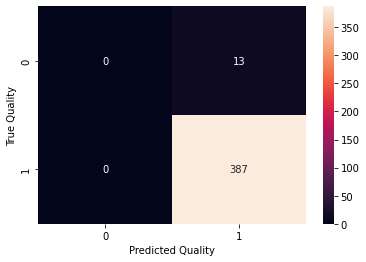

In [27]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['0','1'], 
                     columns = ['0','1'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

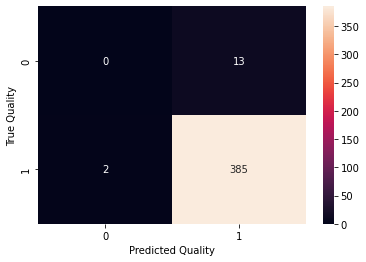

In [28]:
#Confussion Matrix for the Random Forest Regression Model
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['0','1'], 
                     columns = ['0','1'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

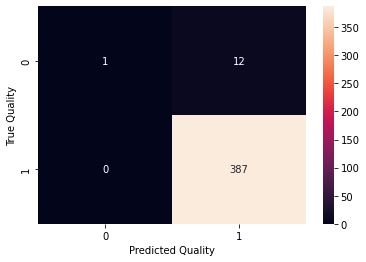

In [29]:
#Confussion Matrix for the K-Nearest Neighbours
label_aux = plt.subplot()
cm_knn = confusion_matrix(y_test,y_prediction_knn)
cm_knn = pd.DataFrame(cm_knn,
                     index = ['0','1'], 
                     columns = ['0','1'])
sns.heatmap(cm_knn,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

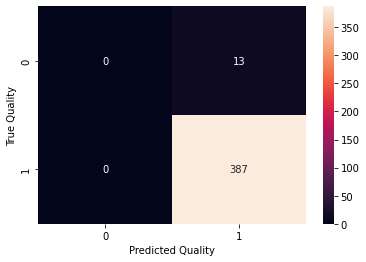

In [30]:
#Confussion Matrix for the SVC
label_aux = plt.subplot()
cm_svc = confusion_matrix(y_test,y_prediction_svc)
cm_svc = pd.DataFrame(cm_svc,
                     index = ['0','1'], 
                     columns = ['0','1'])
sns.heatmap(cm_svc,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

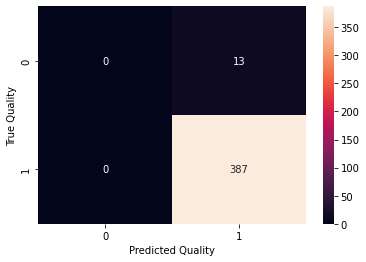

In [31]:
#Confussion Matrix for the Naive Bayes
label_aux = plt.subplot()
cm_gnb = confusion_matrix(y_test,y_prediction_gnb)
cm_gnb = pd.DataFrame(cm_gnb,
                     index = ['0','1'], 
                     columns = ['0','1'])
sns.heatmap(cm_gnb,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

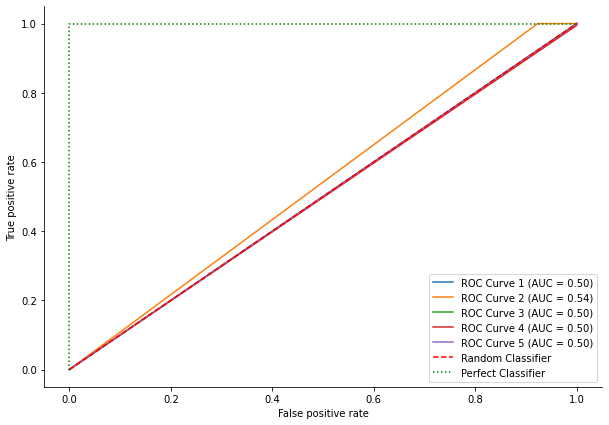

In [32]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = roc_curve(y_test, y_prediction_lr, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, thresholds = roc_curve(y_test, y_prediction_knn, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, thresholds = roc_curve(y_test, y_prediction_gnb, pos_label=1)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, thresholds = roc_curve(y_test, y_prediction_rf, pos_label=1)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, thresholds = roc_curve(y_test, y_prediction_svc, pos_label=1)
roc_auc5 = auc(fpr5, tpr5)

fig, ax = plt.subplots(figsize=(10, 7))

plt.plot(fpr1, tpr1, label='ROC Curve 1 (AUC = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, label='ROC Curve 2 (AUC = %0.2f)' % (roc_auc2))
plt.plot(fpr3, tpr3, label='ROC Curve 3 (AUC = %0.2f)' % (roc_auc3))
plt.plot(fpr4, tpr4, label='ROC Curve 4 (AUC = %0.2f)' % (roc_auc4))
plt.plot(fpr5, tpr5, label='ROC Curve 5 (AUC = %0.2f)' % (roc_auc5))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

the most skillfull of my models on a relative basis is knn with auc of 0.54